# **Phase 1**

## **1: Problem Statement**

### **1.1.1 Problem Statement**
This project’s goal is to make a detailed analysis on why road accidents are occurring a lot and in what trend, will be helpful in improving road safety measures & make the policy options which can reduce the number of accidents. This research would help to know the impacts of accident severity on the driver attributes, vehicle conditions, surface conditions and environmental conditions.

### **1.1.2 Potential Contribution & Importance**
Road accidents pose a threat to health globally by resulting in significant fatalities and injuries of individuals worldwide. This evaluation plays a role in finding factors that play a vital role in accident prevention. The evidence of this review may support the implementation of measures of safety, improvement of driver education programs, and modification of road systems that can reduce accidents and save lives.

#### Piyush Gulhane:

#### Question 1:
What is the Impact of area, type of road cross-section, type of roads and road alignment on  different types of Accidents


*   This analysis will help us identify accident prone areas, common mistakes in road infrastructure, alignment and help us identify potential dark spots. It will help in future planning for Roads construction to avoid such road engineering mistakes like installing traffic signals, gradient of road, signboards, etc.

*   Many a times slope of road, busy cross sections and other factors has influence on the accident, to identify and rectify these factors help in reduction of accidents.



#### Question 2:
 What is the impact of Environmental factors, Light(visibility) impact, Road surface, time of the day, etc.
*   This analysis will  help us understand conditions/situations which forced human error, Most of time unavailability of light, less visibility, heavy rain can increase probability of accident. Appropriate changes in vehicle engineering and roads can help reduce casualties.
*   It is significant to identify conditions which affect driving experience.


## **3: Data Retrieval**

The dataset has been taken from KAGGLE. For this task, we have uploaded a copy of the dataset to a github repository and downloading the data from the github repository directly to the dataframe

In [143]:
import pandas as pd
import warnings
import matplotlib.pyplot as plt
import seaborn as sns

warnings.filterwarnings('ignore')
dataset = pd.read_csv('/content/RTA Dataset.csv')
#dataset = pd.read_csv('https://raw.githubusercontent.com/hmalpani/RTA-Dataset/main/RTA_Dataset.csv')

In [144]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12316 entries, 0 to 12315
Data columns (total 32 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   Time                         12316 non-null  object
 1   Day_of_week                  12316 non-null  object
 2   Age_band_of_driver           12316 non-null  object
 3   Sex_of_driver                12316 non-null  object
 4   Educational_level            11575 non-null  object
 5   Vehicle_driver_relation      11737 non-null  object
 6   Driving_experience           11487 non-null  object
 7   Type_of_vehicle              11366 non-null  object
 8   Owner_of_vehicle             11834 non-null  object
 9   Service_year_of_vehicle      8388 non-null   object
 10  Defect_of_vehicle            7889 non-null   object
 11  Area_accident_occured        12077 non-null  object
 12  Lanes_or_Medians             11931 non-null  object
 13  Road_allignment              12

In [145]:
dataset.head()

,Time,Day_of_week,Age_band_of_driver,Sex_of_driver,Educational_level,Vehicle_driver_relation,Driving_experience,Type_of_vehicle,Owner_of_vehicle,Service_year_of_vehicle,...,Vehicle_movement,Casualty_class,Sex_of_casualty,Age_band_of_casualty,Casualty_severity,Work_of_casuality,Fitness_of_casuality,Pedestrian_movement,Cause_of_accident,Accident_severity
0,17:02:00,Monday,18-30,Male,Above high school,Employee,1-2yr,Automobile,Owner,Above 10yr,...,Going straight,na,na,na,na,NaN,NaN,Not a Pedestrian,Moving Backward,Slight Injury
1,17:02:00,Monday,31-50,Male,Junior high school,Employee,Above 10yr,Public (> 45 seats),Owner,5-10yrs,...,Going straight,na,na,na,na,NaN,NaN,Not a Pedestrian,Overtaking,Slight Injury
2,17:02:00,Monday,18-30,Male,Junior high school,Employee,1-2yr,Lorry (41?100Q),Owner,NaN,...,Going straight,Driver or rider,Male,31-50,3,Driver,NaN,Not a Pedestrian,Changing lane to the left,Serious Injury
3,1:06:00,Sunday,18-30,Male,Junior high school,Employee,5-10yr,Public (> 45 seats),Governmental,NaN,...,Going straight,Pedestrian,Female,18-30,3,Driver,Normal,Not a Pedestrian,Changing lane to the right,Slight Injury
4,1:06:00,Sunday,18-30,Male,Junior high school,Employee,2-5yr,NaN,Owner,5-10yrs,...,Going straight,na,na,na,na,NaN,NaN,Not a Pedestrian,Overtaking,Slight Injury


## **4: Data Cleaning**

### 1) Remove Duplicate Values:
Removing duplicate values is an essential step of data cleaning for any data science project. It helps in reducing the bias where certain data points are represented multiple times. If the duplicate values are not removed, it can skew the results and therefore lead to incorrect conclusions

In [146]:
# Remove duplicates
cleaned_dataset = dataset.drop_duplicates()

### 2) Validation

In [147]:
# Remove entries with 'Number_of_vehicles_involved' = 0
cleaned_dataset = cleaned_dataset[cleaned_dataset['Number_of_vehicles_involved'] != 0]

### 3) Detection and Removal of Outliers

In [148]:
# code for outliers handling

numerical_columns = ['Number_of_vehicles_involved', 'Number_of_casualties']
for column in numerical_columns:
    if not pd.api.types.is_numeric_dtype(cleaned_dataset[column]):
        print(f"Column '{column}' should be numeric but contains non-numeric data.")

def detect_outliers(column):
    Q1 = cleaned_dataset[column].quantile(0.05)
    Q3 = cleaned_dataset[column].quantile(0.95)
    IQR = Q3 - Q1
    outliers = cleaned_dataset[(cleaned_dataset[column] < (Q1 - 1.5 * IQR)) | (cleaned_dataset[column] > (Q3 + 1.5 * IQR))]
    return outliers

for column in numerical_columns:
    outliers = detect_outliers(column)
    if not outliers.empty:
        print(f"Outliers detected in column '{column}':\n", outliers.shape)

def remove_outliers(df, column):
    Q1 = cleaned_dataset[column].quantile(0.05)
    Q3 = cleaned_dataset[column].quantile(0.95)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return cleaned_dataset[(cleaned_dataset[column] >= lower_bound) & (cleaned_dataset[column] <= upper_bound)]

print("Shape before removing outliers:", cleaned_dataset.shape)
# Remove outliers from both columns
cleaned_dataset = remove_outliers(cleaned_dataset, 'Number_of_vehicles_involved')
cleaned_dataset = remove_outliers(cleaned_dataset, 'Number_of_casualties')

# Check the shape of the DataFrame after removal
print("Shape after removing outliers:", cleaned_dataset.shape)

Outliers detected in column 'Number_of_vehicles_involved':
 (7, 32)
Shape before removing outliers: (12316, 32)
Shape after removing outliers: (12309, 32)


### 4) Handling Missing Values:
In this step of Data Cleaning, we either remove or impute the missing values in the dataset

In [149]:
# Find the number of missing values
missing_value_count = cleaned_dataset.isnull().sum()
missing_value_count

,0
Time,0
Day_of_week,0
Age_band_of_driver,0
Sex_of_driver,0
Educational_level,741
Vehicle_driver_relation,579
Driving_experience,829
Type_of_vehicle,950
Owner_of_vehicle,482
Service_year_of_vehicle,3923


In [150]:
dataset_columns = cleaned_dataset.columns.tolist()
missing_values_columns = missing_value_count[missing_value_count > 0].index.tolist()
print(missing_values_columns)

['Educational_level', 'Vehicle_driver_relation', 'Driving_experience', 'Type_of_vehicle', 'Owner_of_vehicle', 'Service_year_of_vehicle', 'Defect_of_vehicle', 'Area_accident_occured', 'Lanes_or_Medians', 'Road_allignment', 'Types_of_Junction', 'Road_surface_type', 'Type_of_collision', 'Vehicle_movement', 'Work_of_casuality', 'Fitness_of_casuality']


In [151]:
# Replace missing values
cleaned_dataset['Educational_level'].fillna(cleaned_dataset['Educational_level'].mode()[0], inplace=True)
cleaned_dataset['Vehicle_driver_relation'].fillna('Unknown', inplace=True)
cleaned_dataset['Driving_experience'].fillna(cleaned_dataset['Driving_experience'].mode()[0], inplace=True)
cleaned_dataset['Type_of_vehicle'].fillna('Unknown', inplace=True)
cleaned_dataset['Owner_of_vehicle'].fillna('Unknown', inplace=True)
cleaned_dataset['Service_year_of_vehicle'].fillna('Unknown', inplace=True)
cleaned_dataset['Defect_of_vehicle'].fillna('No defect', inplace=True)
cleaned_dataset['Area_accident_occured'].fillna('Unknown', inplace=True)
cleaned_dataset['Lanes_or_Medians'].fillna('Unknown', inplace=True)
cleaned_dataset['Road_allignment'].fillna('Unknown', inplace=True)
cleaned_dataset['Types_of_Junction'].fillna('Unknown', inplace=True)
cleaned_dataset['Road_surface_type'].fillna('Unknown', inplace=True)
cleaned_dataset['Type_of_collision'].fillna('Unknown', inplace=True)
cleaned_dataset['Vehicle_movement'].fillna('Unknown', inplace=True)
cleaned_dataset['Work_of_casuality'].fillna('Unknown', inplace=True)
cleaned_dataset['Fitness_of_casuality'].fillna('Unknown', inplace=True)

### 5) Correcting Errors:
In this data cleaning, we identify and fix the errors or incosistencies present in the data

In [152]:
cleaned_dataset['Type_of_vehicle'] = cleaned_dataset['Type_of_vehicle'].replace('Lorry (41?100Q)', 'Lorry (41 - 100 Q)')
cleaned_dataset['Type_of_vehicle'] = cleaned_dataset['Type_of_vehicle'].replace('Lorry (11?40Q)', 'Lorry (11 - 40 Q)')
cleaned_dataset['Type_of_vehicle'] = cleaned_dataset['Type_of_vehicle'].replace('Public (13?45 seats)', 'Public (13 - 45 seats)')
cleaned_dataset['Area_accident_occured'] = cleaned_dataset['Area_accident_occured'].replace('  Recreational areas', 'Recreational areas')
cleaned_dataset['Area_accident_occured'] = cleaned_dataset['Area_accident_occured'].replace('  Market areas', 'Market areas')
cleaned_dataset['Area_accident_occured'] = cleaned_dataset['Area_accident_occured'].replace(' Church areas', 'Church areas')
cleaned_dataset['Area_accident_occured'] = cleaned_dataset['Area_accident_occured'].replace(' Hospital areas', 'Hospital areas')
cleaned_dataset['Area_accident_occured'] = cleaned_dataset['Area_accident_occured'].replace(' Industrial areas', 'Industrial areas')
cleaned_dataset['Area_accident_occured'] = cleaned_dataset['Area_accident_occured'].replace(' Outside rural areas', 'Outside rural areas')
cleaned_dataset['Area_accident_occured'] = cleaned_dataset['Area_accident_occured'].replace('Rural village areasOffice areas', 'Rural Office areas')
cleaned_dataset['Road_allignment'] = cleaned_dataset['Road_allignment'].replace('Tangent road with mountainous terrain and', 'Tangent road with mountainous terrain')
cleaned_dataset['Fitness_of_casuality'] = cleaned_dataset['Fitness_of_casuality'].replace('NormalNormal', 'Normal')
cleaned_dataset['Casualty_severity'] = cleaned_dataset['Casualty_severity'].replace('na', 'Unknown')

### 6) Standardize the Data
a) Convert all the entries in `Time` column to a consistent format.<br>
b) Convert `Over 51` to `51 and Over` in the `Age_band_of_driver` column

In [153]:
# Standardize the 'Time' column
cleaned_dataset['Time'] = pd.to_datetime(cleaned_dataset['Time'], format='%H:%M:%S').dt.time
# Make 'Over 51' to '51 and Over' for Driver Age band
cleaned_dataset['Age_band_of_driver'] = cleaned_dataset['Age_band_of_driver'].replace('Over 51', '51 and Over')

### 7) Parsing the data
Convert all the text in the dataset to lowercase to ensure consistency. This helps in avoiding the situations where same words with different cases are considered different

In [154]:
# Make all the characters to lowercase
cleaned_dataset = cleaned_dataset.map(lambda x: x.lower() if isinstance(x, str) else x)

### 8) Feature Engineering

In [155]:
print(cleaned_dataset['Time'].head())
cleaned_dataset['Hour'] = pd.to_datetime(cleaned_dataset['Time'], format='%H:%M:%S').dt.hour
Time_of_dat = ['Night', 'Morning', 'Noon', 'Evening']

def categorize_time_of_day(hour):
    if 5 <= hour < 12:
        return 2
    elif 12 <= hour < 17:
        return 3
    elif 17 <= hour < 21:
        return 4
    else:
        return 1


cleaned_dataset['Time_of_day'] = cleaned_dataset['Hour'].apply(categorize_time_of_day)

print("Data head after categorizing and encoding Time_of_day:\n")
cleaned_dataset[['Time', 'Hour', 'Time_of_day']].head()


0    17:02:00
1    17:02:00
2    17:02:00
3    01:06:00
4    01:06:00
Name: Time, dtype: object
Data head after categorizing and encoding Time_of_day:



,Time,Hour,Time_of_day
0,17:02:00,17,4
1,17:02:00,17,4
2,17:02:00,17,4
3,01:06:00,1,1
4,01:06:00,1,1


#### 9) Ordinal & One Hot Encoding

In [156]:
from sklearn.preprocessing import OneHotEncoder

encoding_dict = {
    'Day_of_week': 'ordinal',
    'Age_band_of_driver': 'ordinal',
    'Sex_of_driver': 'one_hot',
    'Educational_level': 'ordinal',
    'Vehicle_driver_relation': 'one_hot',
    'Driving_experience': 'ordinal',
    'Type_of_vehicle': 'one_hot',
    'Owner_of_vehicle': 'one_hot',
    'Service_year_of_vehicle': 'ordinal',
    'Defect_of_vehicle': 'one_hot',
    'Area_accident_occured': 'one_hot',
    'Lanes_or_Medians': 'one_hot',
    'Road_allignment': 'one_hot',
    'Types_of_Junction': 'one_hot',
    'Road_surface_type': 'one_hot',
    'Road_surface_conditions': 'ordinal',
    'Light_conditions': 'one_hot',
    'Weather_conditions': 'one_hot',
    'Type_of_collision': 'one_hot',
    'Vehicle_movement': 'one_hot',
    'Casualty_class': 'one_hot',
    'Sex_of_casualty': 'one_hot',
    'Age_band_of_casualty': 'ordinal',
    'Casualty_severity': 'ordinal',
    'Work_of_casuality': 'one_hot',
    'Fitness_of_casuality': 'one_hot',
    'Pedestrian_movement': 'one_hot',
    'Cause_of_accident': 'one_hot',
    'Accident_severity': 'ordinal'
}

ordinal_mappings = {
    'Day_of_week': {
        'Monday': 0, 'Tuesday': 1, 'Wednesday': 2, 'Thursday': 3,
        'Friday': 4, 'Saturday': 5, 'Sunday': 6, 'Unknown': -1
    },
    'Age_band_of_driver': {
        'Under 18': 0, '18-30': 1, '31-50': 2, 'Over 51': 3, 'Unknown': -1
    },
    'Educational_level': {
        'Illiterate': 0, 'Writing & reading': 1, 'Elementary school': 2,
        'Junior high school': 3, 'High school': 4, 'Above high school': 5,
        'Unknown': -1
    },
    'Driving_experience': {
        'No Licence': 0, 'Below 1yr': 1, '1-2yr': 2, '2-5yr': 3, '5-10yr': 4,
        'Above 10yr': 5, 'unknown': -1
    },
    'Service_year_of_vehicle': {
        'Below 1yr': 0, '1-2yr': 1, '2-5yrs': 2, '5-10yrs': 3,
        'Above 10yr': 4, 'Unknown': -1
    },
    'Road_surface_conditions': {
        'Dry': 0, 'Wet or damp': 1, 'Snow': 2, 'Flood over 3cm. deep': 3, 'Unknown': -1
    },
    'Age_band_of_casualty': {
        'Under 18': 0, '18-30': 1, '31-50': 2, 'Over 51': 3, '5': 4, 'na': -1, 'Unknown': -1
    },
    'Casualty_severity': {
        '3': 0, '2': 1, '1': 2, 'na': -1, 'Unknown': -1
    },
    'Accident_severity': {
        'Slight Injury': 0, 'Serious Injury': 1, 'Fatal injury': 2, 'Unknown': -1
    }
}

def apply_encoding(df, encoding_dict, ordinal_mappings):
    one_hot_encoder = OneHotEncoder(sparse_output=False, drop='first')

    for column, encoding_type in encoding_dict.items():
        if encoding_type == 'ordinal':
            # Apply ordinal encoding using a mapping dictionary
            if column in ordinal_mappings:
                df[f"{column}_ordinal"] = df[column].map(ordinal_mappings[column])
            else:
                print(f"No ordinal mapping provided for column: {column}")

        elif encoding_type == 'one_hot':
            one_hot_encoded_df = pd.get_dummies(df[column], prefix=column, drop_first=True)
            df = pd.concat([df, one_hot_encoded_df], axis=1)

        else:
            print(f"Unknown encoding type: {encoding_type} for column: {column}")

    return df

cleaned_dataset = apply_encoding(cleaned_dataset, encoding_dict, ordinal_mappings)

cleaned_dataset.head()

,Time,Day_of_week,Age_band_of_driver,Sex_of_driver,Educational_level,Vehicle_driver_relation,Driving_experience,Type_of_vehicle,Owner_of_vehicle,Service_year_of_vehicle,...,Cause_of_accident_no priority to pedestrian,Cause_of_accident_no priority to vehicle,Cause_of_accident_other,Cause_of_accident_overloading,Cause_of_accident_overspeed,Cause_of_accident_overtaking,Cause_of_accident_overturning,Cause_of_accident_turnover,Cause_of_accident_unknown,Accident_severity_ordinal
0,17:02:00,monday,18-30,male,above high school,employee,1-2yr,automobile,owner,above 10yr,...,False,False,False,False,False,False,False,False,False,NaN
1,17:02:00,monday,31-50,male,junior high school,employee,above 10yr,public (> 45 seats),owner,5-10yrs,...,False,False,False,False,False,True,False,False,False,NaN
2,17:02:00,monday,18-30,male,junior high school,employee,1-2yr,lorry (41 - 100 q),owner,unknown,...,False,False,False,False,False,False,False,False,False,NaN
3,01:06:00,sunday,18-30,male,junior high school,employee,5-10yr,public (> 45 seats),governmental,unknown,...,False,False,False,False,False,False,False,False,False,NaN
4,01:06:00,sunday,18-30,male,junior high school,employee,2-5yr,unknown,owner,5-10yrs,...,False,False,False,False,False,True,False,False,False,NaN


In [157]:
def categorize_time_of_dayby3(hour):
    if 3<= hour < 6:
        return 'Early Morning'
    elif 6 <= hour < 9:
        return 'Morning'
    elif 9 <= hour < 12:
        return 'Pre-Noon'
    elif 12 <= hour < 15:
        return 'Post-Noon'
    elif 15 <= hour < 18:
        return 'Evening'
    elif 18 <= hour < 21:
        return 'Night'
    elif 21 <= hour < 24:
        return 'Late-Night'
    else:
        return 'Midnight'

df_new=cleaned_dataset
df_new['Time_of_day_3hr'] = df_new['Hour'].apply(categorize_time_of_dayby3)

**Question 1:**

**Analysis of impact of Roads,type of Road cross-section, type of Roads and Road alignment on different types of Accidents**

**Algorithm 1 : K-Nearest Neighbors(KNN)**


*   KNN is a Supervised learning Algorithm that makes classification based on the k nearest neighbours of the given data point.
*   Class is assigned to data point based on the majority of the nearest points.

*   K is determined by trial and error. Select the value that gives best accuracy and performance






**Why KNN?**

KNN is simple , easy to train and is effective for dataset with medium size,

It is a lazy learning alogrithm where predictions are made at runtime.

Less number of parameters to consider while training.


In [158]:
cleaned_df = pd.DataFrame(df_new)
dfknn= cleaned_df[['Time_of_day_3hr','Area_accident_occured','Lanes_or_Medians','Road_allignment','Types_of_Junction','Type_of_collision','Vehicle_movement','Cause_of_accident','Accident_severity']]
dfknn.head(10)

,Time_of_day_3hr,Area_accident_occured,Lanes_or_Medians,Road_allignment,Types_of_Junction,Type_of_collision,Vehicle_movement,Cause_of_accident,Accident_severity
0,Evening,residential areas,unknown,tangent road with flat terrain,no junction,collision with roadside-parked vehicles,going straight,moving backward,slight injury
1,Evening,office areas,undivided two way,tangent road with flat terrain,no junction,vehicle with vehicle collision,going straight,overtaking,slight injury
2,Evening,recreational areas,other,unknown,no junction,collision with roadside objects,going straight,changing lane to the left,serious injury
3,Midnight,office areas,other,tangent road with mild grade and flat terrain,y shape,vehicle with vehicle collision,going straight,changing lane to the right,slight injury
4,Midnight,industrial areas,other,tangent road with flat terrain,y shape,vehicle with vehicle collision,going straight,overtaking,slight injury
5,Post-Noon,unknown,unknown,unknown,y shape,vehicle with vehicle collision,u-turn,overloading,slight injury
6,Evening,residential areas,undivided two way,tangent road with flat terrain,crossing,vehicle with vehicle collision,moving backward,other,slight injury
7,Evening,residential areas,other,tangent road with flat terrain,y shape,vehicle with vehicle collision,u-turn,no priority to vehicle,slight injury
8,Evening,industrial areas,other,tangent road with flat terrain,y shape,collision with roadside-parked vehicles,going straight,changing lane to the right,slight injury
9,Evening,residential areas,undivided two way,tangent road with flat terrain,y shape,collision with roadside-parked vehicles,u-turn,moving backward,serious injury


In [159]:
from sklearn.preprocessing import LabelEncoder
LE = LabelEncoder()
dfknn=dfknn.apply(LE.fit_transform)

KNN model that fits to given training data and calculates the performance based on testing data.

It checks the performance for k ranging from 2 to 10, allowing us to select the best value of k



In [160]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler

def knn_model(x,y):
  X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.20, random_state=42)
  bestaccuracy=0
  corresponding_k=0

  for i in range(2,10):
    k = i
    knn = KNeighborsClassifier(n_neighbors=k)

    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)

    accuracy = accuracy_score(y_test, y_pred)
    if accuracy>bestaccuracy:
      bestaccuracy = accuracy
      corresponding_k=i
    print(f"Accuracy for k :{i}=>", accuracy)
  return corresponding_k,bestaccuracy

**Predicting Accident Severity based on data**

The analysis helps us understand injury that are caused due to accidents. analysing the Type of collision, reasons behind it and other factors help to take steps to improve facilities, infrastructure the help to reduce the fatal injury.

The data learned from this dataset can be used to identify and rectify features in different location where similar factors are seen.

In [161]:
dfc= cleaned_df.groupby('Accident_severity').size()
dfc.head(10)

,0
Accident_severity,
fatal injury,158
serious injury,1743
slight injury,10408


In [162]:
from sklearn.model_selection import train_test_split
from sklearn.utils import resample

majority_class = dfknn[dfknn.Accident_severity == 2]
minority_class = dfknn[dfknn.Accident_severity == 0]
minority_class1 = dfknn[dfknn.Accident_severity == 1]

minority_upsampled = resample(minority_class, replace=True,n_samples=len(majority_class),random_state=42)

minority_upsampled1 = resample(minority_class1, replace=True, n_samples=len(majority_class),  random_state=42)

upsampled_data = pd.concat([majority_class, minority_upsampled, minority_upsampled1])

x = upsampled_data.drop('Accident_severity', axis=1)
y = upsampled_data['Accident_severity']

k,accuracy= knn_model(x,y)
print(f"Best Accuracy for k :{k} with accuracy=>", accuracy)

Accuracy for k :2=> 0.8499599679743794
Accuracy for k :3=> 0.8526821457165733
Accuracy for k :4=> 0.82257806244996
Accuracy for k :5=> 0.8214571657325861
Accuracy for k :6=> 0.7972778222578062
Accuracy for k :7=> 0.7942353883106485
Accuracy for k :8=> 0.7743795036028823
Accuracy for k :9=> 0.7694155324259407
Best Accuracy for k :3 with accuracy=> 0.8526821457165733


Using KNN algorithm to predict accident severity based on area,type of crossing, vechile movement etc gives **accuracy of about 85% for k = 3**




**Predicting Type of Junction based on data**

It assists in avoiding the design of junctions in areas, locations, etc which result in more accidents

We can train the model to get most appropiate section of road that should be present based on such data analysis and selecting one which has lowest impact on accident count along with other variables.

From graphs we see the distribution of different vehicle movement aat cross section. Suggesting measures to allow restrict particular direction movement of vehicle, like u-tuen can be restricted or one -way traffic etc.

In [163]:
dfc= cleaned_df.groupby('Types_of_Junction').size()
dfc.head(10)

,0
Types_of_Junction,
crossing,2177
no junction,3830
o shape,164
other,445
t shape,60
unknown,1078
x shape,12
y shape,4543


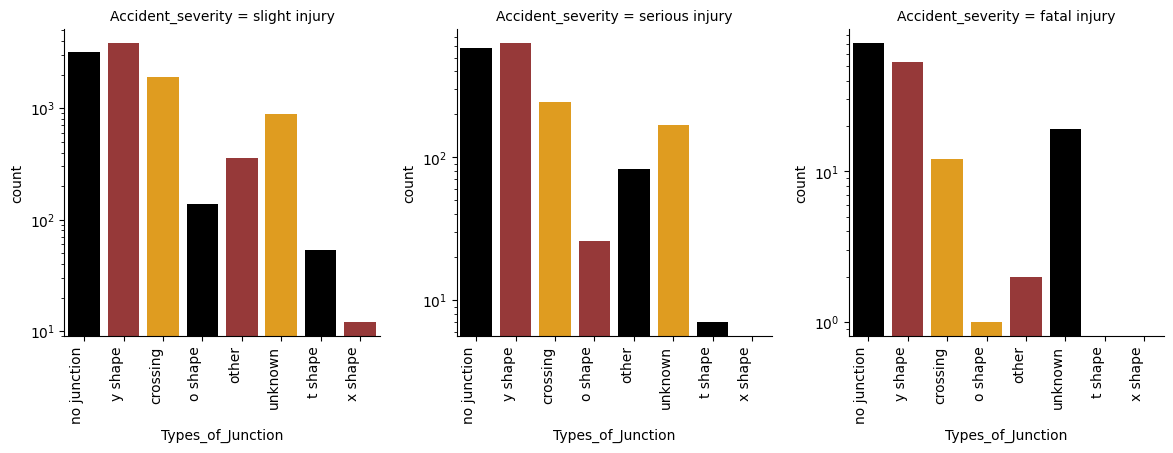

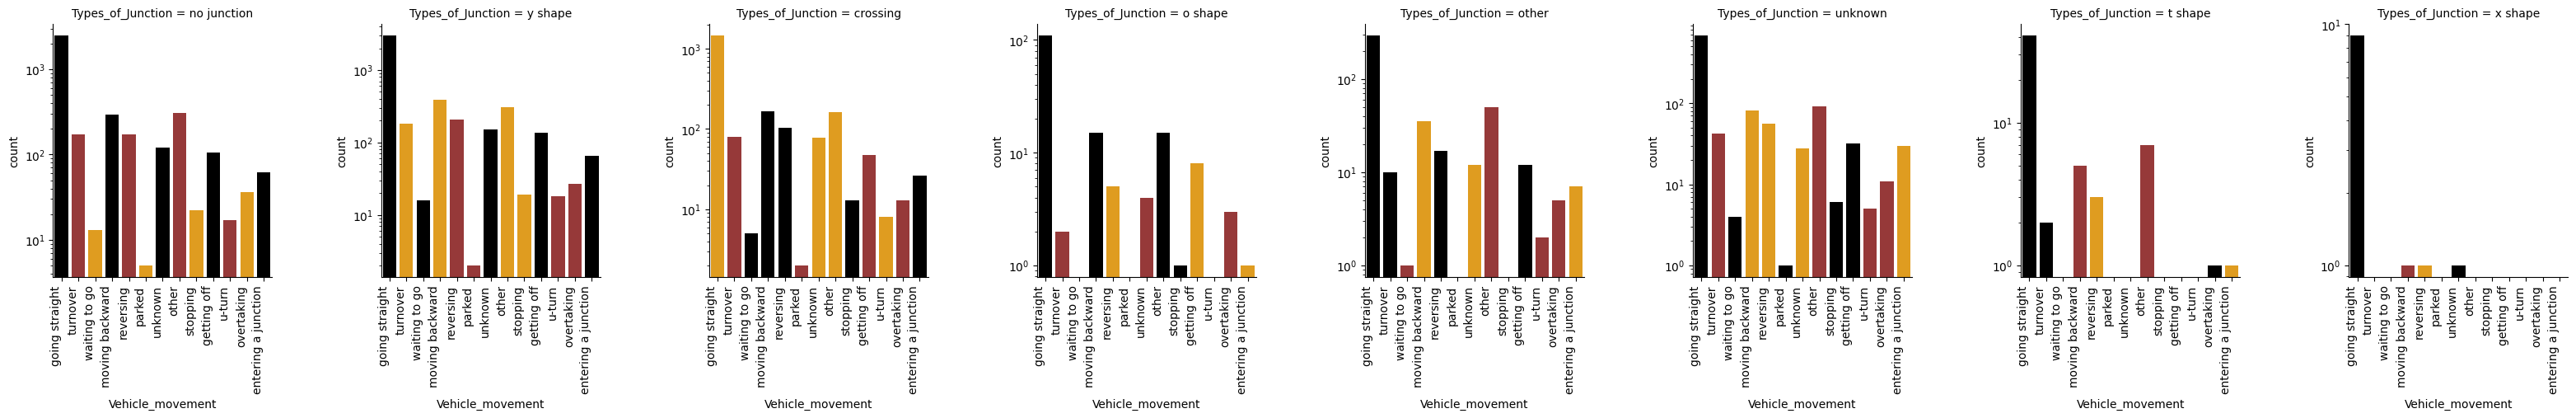

In [164]:
grid = sns.FacetGrid(data=df_new, col='Accident_severity', height=4, aspect=1, sharey=False)
grid.map(sns.countplot, 'Types_of_Junction', palette=['black', 'brown', 'orange'])
for x in grid.axes.flat:
    x.set_yscale('log')
    for label in x.get_xticklabels():
        label.set_rotation(90)
        label.set_ha('right')
plt.show()

grid = sns.FacetGrid(data=df_new, col='Types_of_Junction', height=4, aspect=1, sharey=False)
# mapping bar plot and the data on to the grid
grid.map(sns.countplot, 'Vehicle_movement', palette=['black', 'brown', 'orange'])
for ax in grid.axes.flat:
    ax.set_yscale('log')
    for label in ax.get_xticklabels():
        label.set_rotation(90)
        label.set_ha('right')
plt.show()

Graph shows the vehicle movements at cross sections which led to accidents.

In [165]:
from sklearn.model_selection import train_test_split
from sklearn.utils import resample

majority_class = dfknn[dfknn.Types_of_Junction == 1]
minority_class = dfknn[dfknn.Types_of_Junction == 0]
minority_upsampled = resample(minority_class,replace=True, n_samples=len(majority_class), random_state=42)

minority_class1 = dfknn[dfknn.Types_of_Junction == 2]
minority_upsampled1 = resample(minority_class1,replace=True, n_samples=len(majority_class), random_state=42)
minority_class2 = dfknn[dfknn.Types_of_Junction == 4]
minority_upsampled2 = resample(minority_class2,replace=True,  n_samples=len(majority_class), random_state=42)
minority_class3 = dfknn[dfknn.Types_of_Junction == 5]
minority_upsampled3 = resample(minority_class3,replace=True,   n_samples=len(majority_class),random_state=42)
minority_class4 = dfknn[dfknn.Types_of_Junction == 6]
minority_upsampled4 = resample(minority_class4,replace=True, n_samples=len(majority_class),  random_state=42)
minority_class5 = dfknn[dfknn.Types_of_Junction == 3]
minority_upsampled5 = resample(minority_class5,replace=True,   n_samples=len(majority_class), random_state=42)
minority_class6 = dfknn[dfknn.Types_of_Junction == 7]
minority_upsampled6 = resample(minority_class6,replace=True, n_samples=len(majority_class),random_state=42)

upsampled_data = pd.concat([majority_class, minority_upsampled, minority_upsampled1,minority_upsampled2,minority_upsampled3,minority_upsampled4,minority_upsampled5,minority_upsampled6])

x = upsampled_data.drop('Types_of_Junction',axis=1)
y=  upsampled_data['Types_of_Junction']
k,accuracy= knn_model(x,y)
print(f"Best Accuracy for k :{k} with accuracy=>", accuracy)

Accuracy for k :2=> 0.7315600522193212
Accuracy for k :3=> 0.7242167101827677
Accuracy for k :4=> 0.7018603133159269
Accuracy for k :5=> 0.6940274151436031
Accuracy for k :6=> 0.6817885117493473
Accuracy for k :7=> 0.6656331592689295
Accuracy for k :8=> 0.6568211488250653
Accuracy for k :9=> 0.6460509138381201
Best Accuracy for k :2 with accuracy=> 0.7315600522193212


Using KNN algorithm to predict Juction Type based on area,accident severity, vechile movement etc gives **accuracy of about 73% for k = 2**

**Predicting Movement of vehicle involved in accident based on data**

This helps to get the vehicle movement which led to accident. Helping to generate awareness and warnings to drive safely, avoid overtaking etc.

If some roads are designed, then to avoid accidents using already known factors measures can be taken to restrict accident prone vehicle movement.

In [166]:
dfc= cleaned_df.groupby('Vehicle_movement').size()
dfc.head(10)

,0
Vehicle_movement,
entering a junction,193
getting off,339
going straight,8154
moving backward,984
other,937
overtaking,96
parked,10
reversing,563
stopping,61


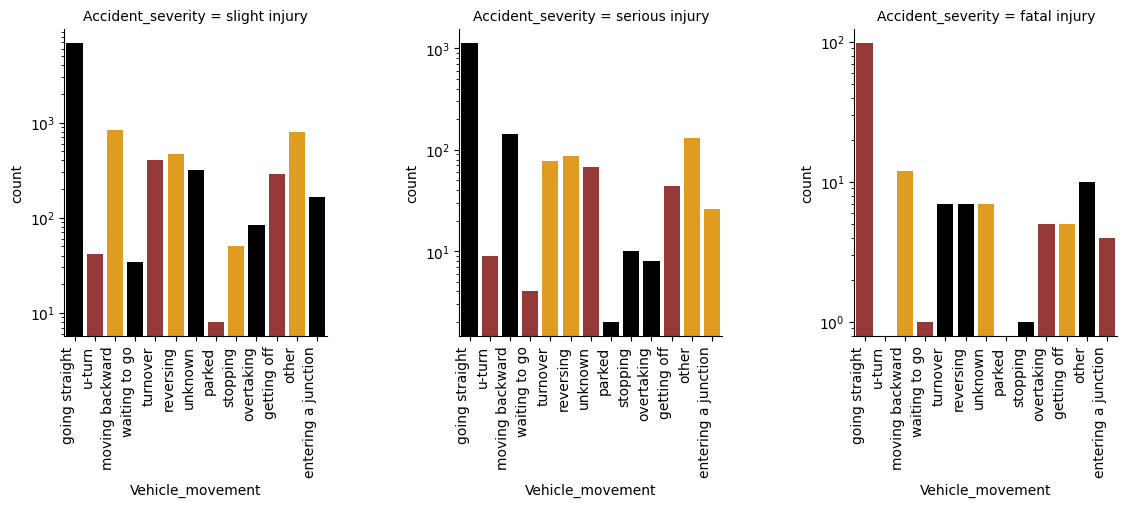

In [167]:
grid = sns.FacetGrid(data=df_new, col='Accident_severity', height=4, aspect=1, sharey=False)
grid.map(sns.countplot, 'Vehicle_movement', palette=['black', 'brown', 'orange'])
for x in grid.axes.flat:
    x.set_yscale('log')
    for label in x.get_xticklabels():
        label.set_rotation(90)
        label.set_ha('right')
plt.show()

In [168]:
from sklearn.model_selection import train_test_split
from sklearn.utils import resample

majority_class = dfknn[dfknn.Vehicle_movement == 2]
minority_class = dfknn[dfknn.Vehicle_movement == 0]
minority_upsampled = resample(minority_class,replace=True, n_samples=len(majority_class), random_state=42)

minority_class1 = dfknn[dfknn.Vehicle_movement == 1]
minority_upsampled1 = resample(minority_class1,replace=True, n_samples=len(majority_class), random_state=42)
minority_class2 = dfknn[dfknn.Vehicle_movement == 4]
minority_upsampled2 = resample(minority_class2,replace=True,  n_samples=len(majority_class), random_state=42)
minority_class3 = dfknn[dfknn.Vehicle_movement == 5]
minority_upsampled3 = resample(minority_class3,replace=True,   n_samples=len(majority_class),random_state=42)
minority_class4 = dfknn[dfknn.Vehicle_movement == 6]
minority_upsampled4 = resample(minority_class4,replace=True, n_samples=len(majority_class),  random_state=42)
minority_class5 = dfknn[dfknn.Vehicle_movement == 3]
minority_upsampled5 = resample(minority_class5,replace=True,   n_samples=len(majority_class), random_state=42)
minority_class6 = dfknn[dfknn.Vehicle_movement == 7]
minority_upsampled6 = resample(minority_class6,replace=True, n_samples=len(majority_class),random_state=42)
minority_class7 = dfknn[dfknn.Vehicle_movement == 8]
minority_upsampled7 = resample(minority_class7,replace=True, n_samples=len(majority_class),random_state=42)
minority_class8 = dfknn[dfknn.Vehicle_movement == 9]
minority_upsampled8 = resample(minority_class8,replace=True, n_samples=len(majority_class),random_state=42)
minority_class9 = dfknn[dfknn.Vehicle_movement == 10]
minority_upsampled9 = resample(minority_class9,replace=True, n_samples=len(majority_class),random_state=42)
minority_class10 = dfknn[dfknn.Vehicle_movement == 11]
minority_upsampled10 = resample(minority_class10,replace=True, n_samples=len(majority_class),random_state=42)
minority_class11 = dfknn[dfknn.Vehicle_movement == 12]
minority_upsampled11 = resample(minority_class11,replace=True, n_samples=len(majority_class),random_state=42)

upsampled_data = pd.concat([majority_class, minority_upsampled, minority_upsampled1,minority_upsampled2,minority_upsampled3,minority_upsampled4,minority_upsampled5,minority_upsampled6,minority_upsampled7,minority_upsampled8,minority_upsampled9,minority_upsampled10,minority_upsampled11])

x = upsampled_data.drop('Vehicle_movement',axis=1)
y=  upsampled_data['Vehicle_movement']
k,accuracy= knn_model(x,y)


Accuracy for k :2=> 0.8794868166595915
Accuracy for k :3=> 0.8880241498042545
Accuracy for k :4=> 0.8850997594453092
Accuracy for k :5=> 0.8789208056223763
Accuracy for k :6=> 0.8790151407952455
Accuracy for k :7=> 0.8742512145653507
Accuracy for k :8=> 0.8713268242064054
Accuracy for k :9=> 0.8642516862412151


Using KNN algorithm to predict Vehicle movement at time of acccident based on area,type of crossing, lanes, time of day etc gives **accuracy of about 88% for k = 5**

**Predicting Area of Accident based on data**

Graph shows the day-phase wise accidents in particular area,


In [169]:
dfc= cleaned_df.groupby('Area_accident_occured').size()
dfc.head(15)

,0
Area_accident_occured,
church areas,1059
hospital areas,121
industrial areas,456
market areas,63
office areas,3451
other,3816
outside rural areas,218
recreational areas,327
residential areas,2059


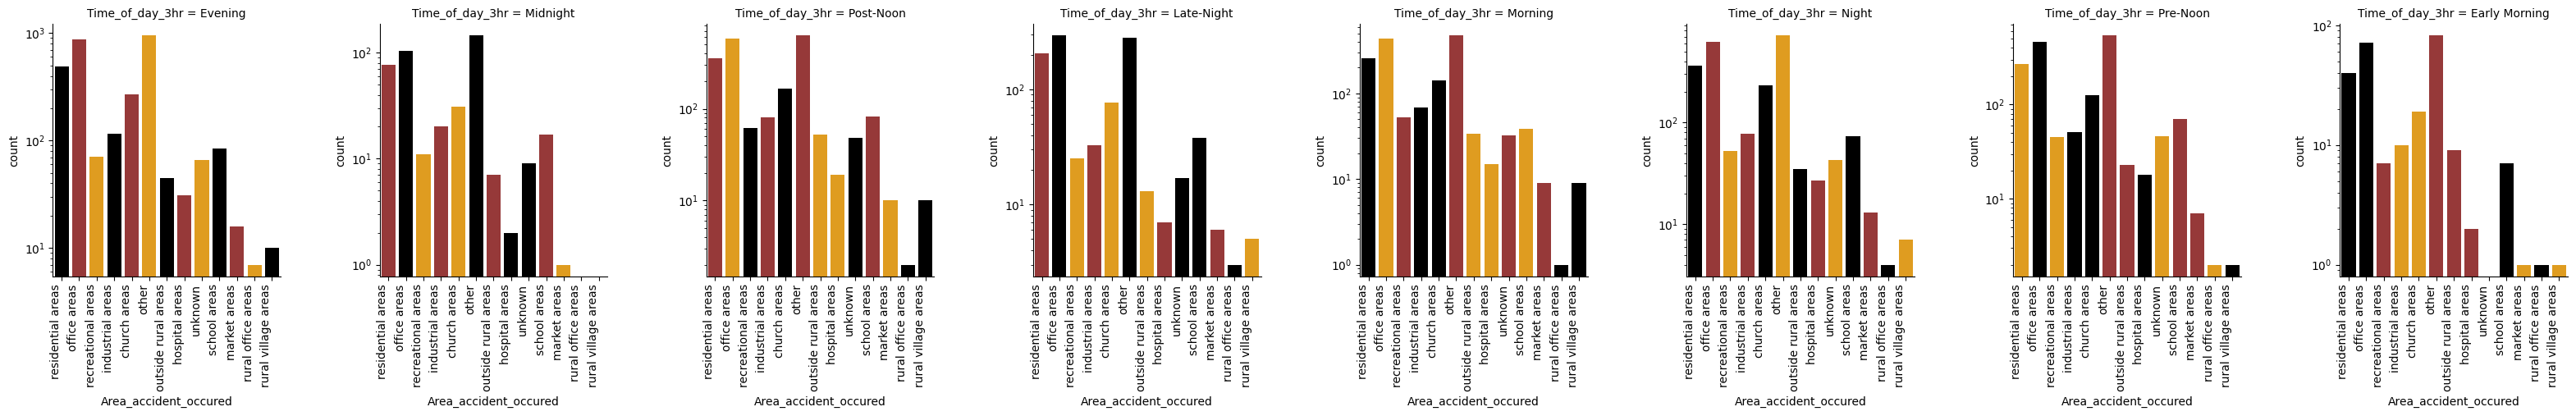

In [170]:
grid = sns.FacetGrid(data=df_new, col='Time_of_day_3hr', height=4, aspect=1, sharey=False)
# mapping bar plot and the data on to the grid
grid.map(sns.countplot, 'Area_accident_occured', palette=['black', 'brown', 'orange'])
for ax in grid.axes.flat:
    ax.set_yscale('log')
    for label in ax.get_xticklabels():
        label.set_rotation(90)
        label.set_ha('right')
plt.show()

In [171]:
from sklearn.model_selection import train_test_split
from sklearn.utils import resample

majority_class = dfknn[dfknn.Area_accident_occured == 5]
minority_class = dfknn[dfknn.Area_accident_occured == 0]
minority_upsampled = resample(minority_class,replace=True, n_samples=len(majority_class), random_state=42)
minority_class1 = dfknn[dfknn.Area_accident_occured == 1]
minority_upsampled1 = resample(minority_class1,replace=True, n_samples=len(majority_class), random_state=42)
minority_class2 = dfknn[dfknn.Area_accident_occured == 4]
minority_upsampled2 = resample(minority_class2,replace=True,  n_samples=len(majority_class), random_state=42)
minority_class3 = dfknn[dfknn.Area_accident_occured == 2]
minority_upsampled3 = resample(minority_class3,replace=True,   n_samples=len(majority_class),random_state=42)
minority_class4 = dfknn[dfknn.Area_accident_occured == 6]
minority_upsampled4 = resample(minority_class4,replace=True, n_samples=len(majority_class),  random_state=42)
minority_class5 = dfknn[dfknn.Area_accident_occured == 3]
minority_upsampled5 = resample(minority_class5,replace=True,   n_samples=len(majority_class), random_state=42)
minority_class6 = dfknn[dfknn.Area_accident_occured == 7]
minority_upsampled6 = resample(minority_class6,replace=True, n_samples=len(majority_class),random_state=42)
minority_class7 = dfknn[dfknn.Area_accident_occured == 8]
minority_upsampled7 = resample(minority_class7,replace=True, n_samples=len(majority_class),random_state=42)
minority_class8 = dfknn[dfknn.Area_accident_occured == 9]
minority_upsampled8 = resample(minority_class8,replace=True, n_samples=len(majority_class),random_state=42)
minority_class9 = dfknn[dfknn.Area_accident_occured == 10]
minority_upsampled9 = resample(minority_class9,replace=True, n_samples=len(majority_class),random_state=42)
minority_class10 = dfknn[dfknn.Area_accident_occured == 11]
minority_upsampled10 = resample(minority_class10,replace=True, n_samples=len(majority_class),random_state=42)
minority_class11 = dfknn[dfknn.Area_accident_occured == 12]
minority_upsampled11 = resample(minority_class11,replace=True, n_samples=len(majority_class),random_state=42)

upsampled_data = pd.concat([majority_class, minority_upsampled, minority_upsampled1,minority_upsampled2,minority_upsampled3,minority_upsampled4,minority_upsampled5,minority_upsampled6,minority_upsampled7,minority_upsampled8,minority_upsampled9,minority_upsampled10,minority_upsampled11])

x = upsampled_data.drop('Area_accident_occured',axis=1)
y =  upsampled_data['Area_accident_occured']
k,accuracy= knn_model(x,y)


Accuracy for k :2=> 0.7674863938722032
Accuracy for k :3=> 0.7691997581132836
Accuracy for k :4=> 0.7613384398306793
Accuracy for k :5=> 0.7481354565611772
Accuracy for k :6=> 0.7413827857286838
Accuracy for k :7=> 0.7320096754686555
Accuracy for k :8=> 0.7212255593630317
Accuracy for k :9=> 0.7137673856077403


Using KNN algorithm to predict Area of Accident severity based on type of crossing, vechile movement,time of day etc gives **accuracy of about 77% for k = 3**


**Predicting Collision type based on data**



In [172]:
dfc= cleaned_df.groupby('Type_of_collision').size()
dfc.head(10)

,0
Type_of_collision,
collision with animals,171
collision with pedestrians,896
collision with roadside objects,1785
collision with roadside-parked vehicles,54
fall from vehicles,34
other,26
rollover,396
unknown,169
vehicle with vehicle collision,8769


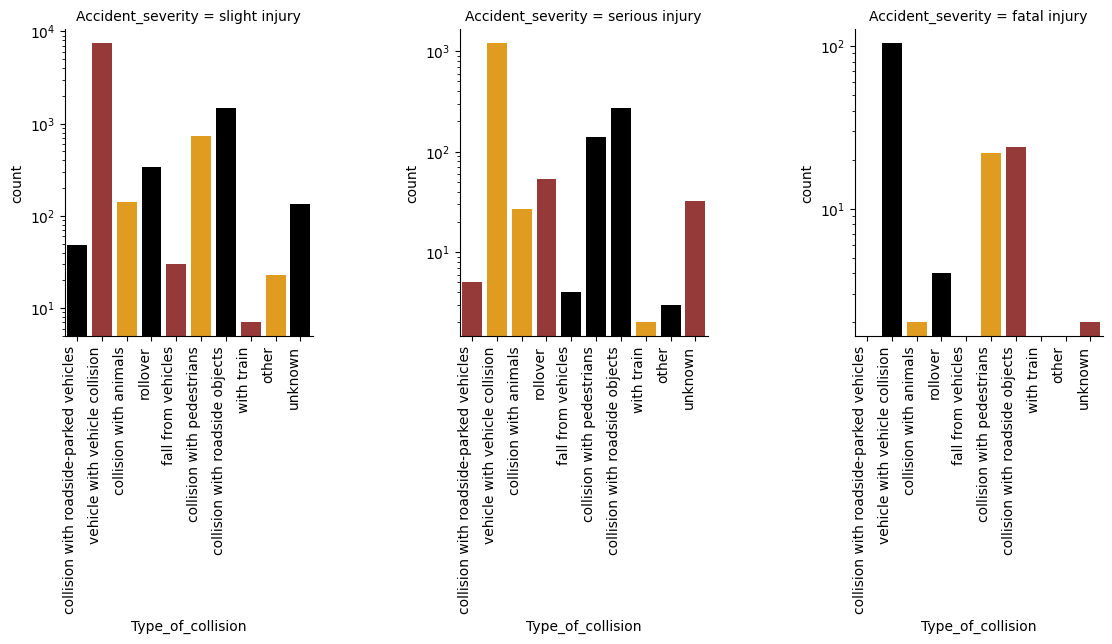

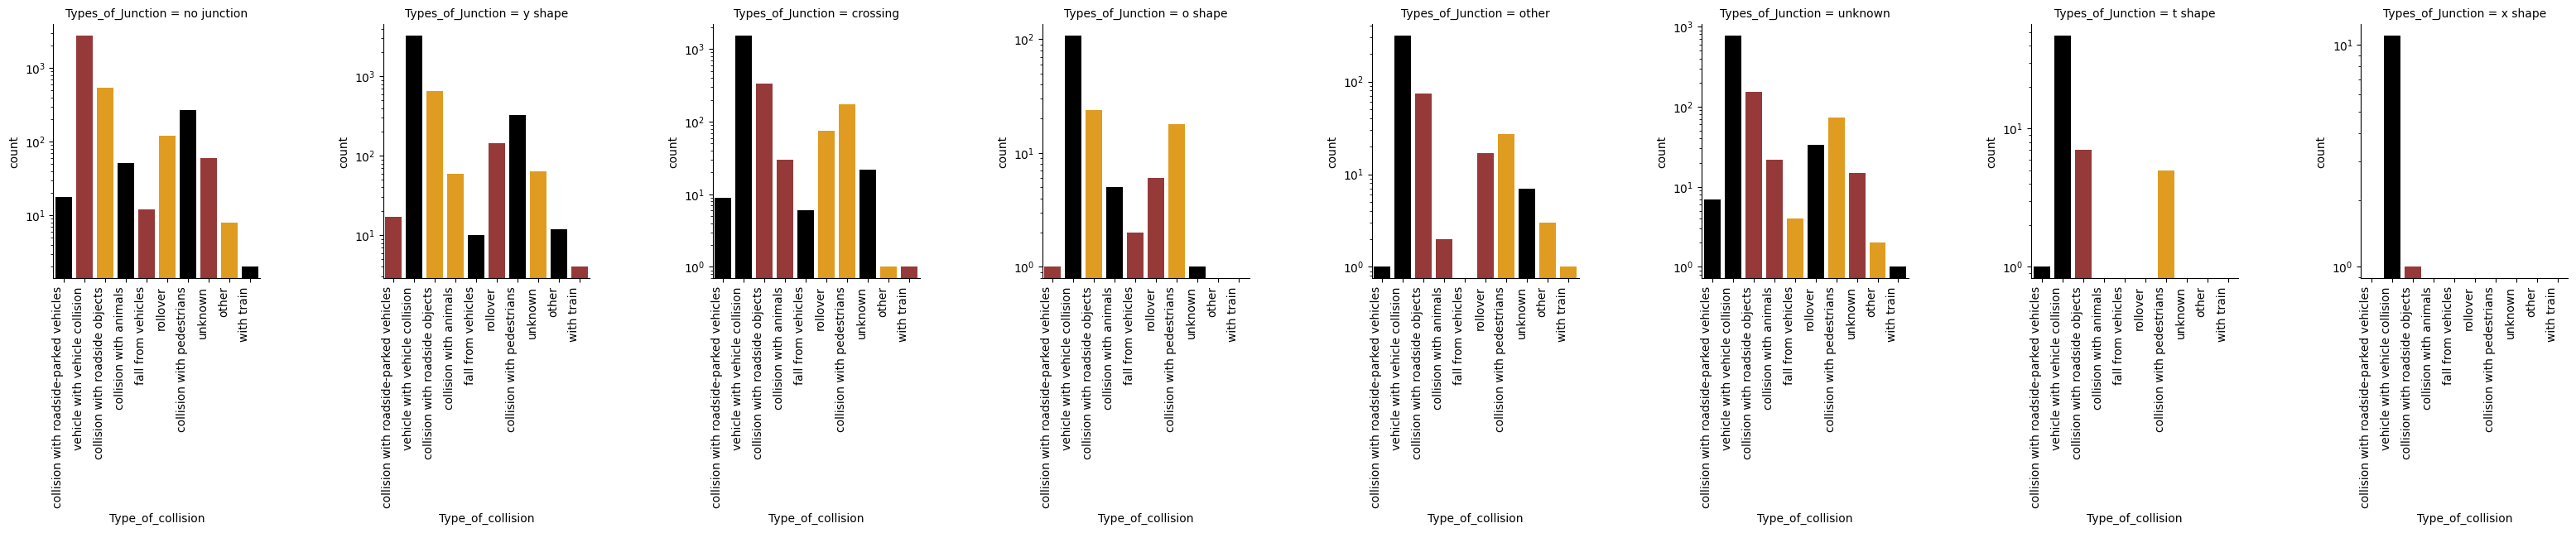

In [173]:
grid = sns.FacetGrid(data=df_new, col='Accident_severity', height=4, aspect=1, sharey=False)
grid.map(sns.countplot, 'Type_of_collision', palette=['black', 'brown', 'orange'])
for x in grid.axes.flat:
    x.set_yscale('log')
    for label in x.get_xticklabels():
        label.set_rotation(90)
        label.set_ha('right')
plt.show()
grid = sns.FacetGrid(data=df_new, col='Types_of_Junction', height=4, aspect=1, sharey=False)
grid.map(sns.countplot, 'Type_of_collision', palette=['black', 'brown', 'orange'])
for x in grid.axes.flat:
    x.set_yscale('log')
    for label in x.get_xticklabels():
        label.set_rotation(90)
        label.set_ha('right')
plt.show()

In [174]:
from sklearn.model_selection import train_test_split
from sklearn.utils import resample

majority_class = dfknn[dfknn.Type_of_collision == 8]
minority_class = dfknn[dfknn.Type_of_collision == 0]
minority_upsampled = resample(minority_class,replace=True, n_samples=len(majority_class), random_state=42)

minority_class1 = dfknn[dfknn.Type_of_collision == 3]
minority_upsampled1 = resample(minority_class1,replace=True, n_samples=len(majority_class), random_state=42)
minority_class2 = dfknn[dfknn.Type_of_collision == 4]
minority_upsampled2 = resample(minority_class2,replace=True,  n_samples=len(majority_class), random_state=42)
minority_class3 = dfknn[dfknn.Type_of_collision == 5]
minority_upsampled3 = resample(minority_class3,replace=True,   n_samples=len(majority_class),random_state=42)
minority_class4 = dfknn[dfknn.Type_of_collision == 6]
minority_upsampled4 = resample(minority_class4,replace=True, n_samples=len(majority_class),  random_state=42)
minority_class5 = dfknn[dfknn.Type_of_collision == 1]
minority_upsampled5 = resample(minority_class5,replace=True,   n_samples=len(majority_class), random_state=42)
minority_class6 = dfknn[dfknn.Type_of_collision == 7]
minority_upsampled6 = resample(minority_class6,replace=True, n_samples=len(majority_class),random_state=42)
minority_class7 = dfknn[dfknn.Type_of_collision == 2]
minority_upsampled7 = resample(minority_class7,replace=True, n_samples=len(majority_class), random_state=42)
minority_class8 = dfknn[dfknn.Type_of_collision == 9]
minority_upsampled8 = resample(minority_class8,replace=True, n_samples=len(majority_class), random_state=42)

upsampled_data = pd.concat([majority_class, minority_upsampled, minority_upsampled1,minority_upsampled2,minority_upsampled3,minority_upsampled4,minority_upsampled5,minority_upsampled6,minority_upsampled7,minority_upsampled8])
x = upsampled_data.drop('Type_of_collision', axis=1)
y = upsampled_data['Type_of_collision']
k,accuracy= knn_model(x,y)
print(f"Best Accuracy for k :{k} with accuracy=>", accuracy)

Accuracy for k :2=> 0.903352719808416
Accuracy for k :3=> 0.9052913673166838
Accuracy for k :4=> 0.8957121678640666
Accuracy for k :5=> 0.8941726536663246
Accuracy for k :6=> 0.886589120766336
Accuracy for k :7=> 0.8798608735317596
Accuracy for k :8=> 0.8730756072528224
Accuracy for k :9=> 0.8667464933287718
Best Accuracy for k :3 with accuracy=> 0.9052913673166838


Using KNN algorithm to predict Area of Accident severity based on type of crossing, vechile movement,time of day etc gives **accuracy of about 90.5% for k = 3**

**Key Takeaway**

*  From the KNN model implementation,  we are able to predict the issues that can rise during design and construction phase taking into consideration the area of road(how traffic flow is) , time of day(Peak traffic flows, will road has capacity to handle traffic), decision of Junction based on the obseres vehicle moment, type of collision etc.
*   It helps authorities to design better roads keeping into consideration all the factors.


*   
Where there are limitations, proper measures can be taken to avoid accidents and injury caused due to it.
*   According to many study's, road engineering contributes significant share for reasons behind road accident.


*   Such models with help of data and technology will helps to reduce such incidents in future.







